# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create initial empty lists for values
city_ls = []
lats_ls = []
lngs_ls = []
max_temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speed_ls = []
country_ls = []
date_ls = []

# Create the base url for API call
base_url ="https://api.openweathermap.org/data/2.5/weather?q="

# Create counters for processing log
record_count = 0
set_count = 1

print("Beginning Data Retrieval")
print("-----------------------------")
#Create a for loop that will allow you to go through each or the randomly generated cities
for city in cities[:25]:

    # Exception handling to check if the city is not found by the API call
    try:
        # Query url for the API call
        query_url = f"{base_url}{city}&appid={weather_api_key}"
        weather_response = requests.get(query_url).json()
        
        # Data to collect from the API call
        lats_ls.append(weather_response["coord"]["lat"])
        lngs_ls.append(weather_response["coord"]["lon"])
        max_temp_ls.append(weather_response["main"]["temp_max"])
        humidity_ls.append(weather_response["main"]["humidity"])
        cloudiness_ls.append(weather_response["clouds"]["all"])
        wind_speed_ls.append(weather_response["wind"]["speed"])
        country_ls.append(weather_response["sys"]["country"])
        date_ls.append(weather_response["dt"])
        
        # If/Else statement to create the processing log 
        if record_count < 50:
            record_count =  record_count + 1
            city_ls.append(city)
            
            # Print processing log
            print(f"Processing Record {record_count} of Set {set_count} | {city}")   
        else:
            set_count = set_count + 1
            record_count = 0
            city_ls.append(city)
     
    # The exception if the city is not found by the API call       
    except:
        # Print processing log error
        print("City not found. Skipping...")
        
print("-----------------------------")
print("  Data Retrieval Complete  ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushtobe
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | celestun
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 9 of Set 1 | japura
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | rognan
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | portland
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | russell
Proce

In [4]:
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 40.52, 'lon': -107.55},
 'dt': 1607812107,
 'id': 5576064,
 'main': {'feels_like': 259.77,
          'humidity': 73,
          'pressure': 1008,
          'temp': 268.15,
          'temp_max': 268.15,
          'temp_min': 268.15},
 'name': 'Craig',
 'snow': {'1h': 0.44},
 'sys': {'country': 'US',
         'id': 3563,
         'sunrise': 1607783094,
         'sunset': 1607816625,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 340, 'gust': 14.4, 'speed': 7.7}}


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the data collected in a DataFrame
current_weather_data = pd.DataFrame({
  "City": city_ls,
  "Lat": lats_ls,
  "Lng": lngs_ls,
  "Max Temp":  max_temp_ls,
  "Humidity": humidity_ls,
  "Cloudiness": cloudiness_ls,
  "Wind Speed": wind_speed_ls,
  "Country": country_ls,
  "Date": date_ls
   })
current_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,302.15,79,40,4.60,TO,1607812104
1,hermanus,-34.42,19.23,288.71,88,51,0.89,ZA,1607812104
2,ushtobe,45.25,77.98,256.75,89,0,1.72,KZ,1607812104
3,puerto ayora,-0.74,-90.35,301.15,61,0,7.20,EC,1607812036
4,celestun,20.87,-90.40,298.43,68,74,4.72,MX,1607812104
5,georgetown,5.41,100.34,298.15,94,20,1.00,MY,1607811931
6,caravelas,-17.71,-39.25,297.36,79,0,3.77,BR,1607812105
7,ushuaia,-54.80,-68.30,283.15,71,75,11.80,AR,1607812105
8,japura,-0.32,102.35,296.65,94,100,1.32,ID,1607812105
9,airai,-8.93,125.41,290.04,100,100,0.57,TL,1607812105


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [6]:
#Output the data to a csv
current_weather_data.to_csv("output_data/current_weather_data.csv")

In [7]:
#Use describe to generate descriptive statistics
current_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01
mean,-3.786087,-16.146087,289.759130,75.130435,56.521739,4.843043,1.607812e+09
std,35.287044,105.195047,11.348257,14.049602,40.097460,3.347743,6.023508e+01
min,-54.800000,-175.200000,256.750000,50.000000,0.000000,0.450000,1.607812e+09
25%,-28.700000,-90.375000,284.760000,66.000000,11.000000,1.520000,1.607812e+09
50%,-9.800000,-53.460000,294.650000,73.000000,75.000000,4.600000,1.607812e+09
75%,26.610000,89.160000,297.435000,87.500000,90.000000,7.450000,1.607812e+09
max,67.100000,168.860000,302.150000,100.000000,100.000000,11.800000,1.607812e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Locate cities with humidity over 100 (if applicable)
humid_over100 = current_weather_data.loc[current_weather_data["Humidity"] > 100]
humid_over100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humid_over100.index

Int64Index([], dtype='int64')

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [11]:
clean_city_data = current_weather_data.loc[current_weather_data["Humidity"] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,302.15,79,40,4.60,TO,1607812104
1,hermanus,-34.42,19.23,288.71,88,51,0.89,ZA,1607812104
2,ushtobe,45.25,77.98,256.75,89,0,1.72,KZ,1607812104
3,puerto ayora,-0.74,-90.35,301.15,61,0,7.20,EC,1607812036
4,celestun,20.87,-90.40,298.43,68,74,4.72,MX,1607812104


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

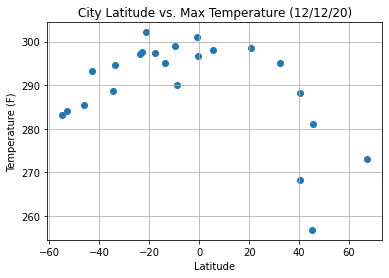

In [14]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Max_Temp.png")

# Display the graph
plt.show()



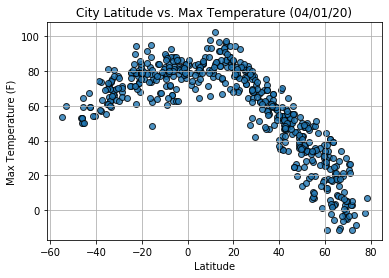

## Latitude vs. Humidity Plot

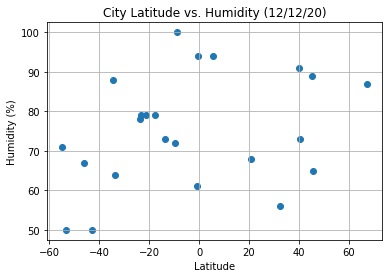

In [15]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Humidity ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Humidity.png")

# Display the graph
plt.show()

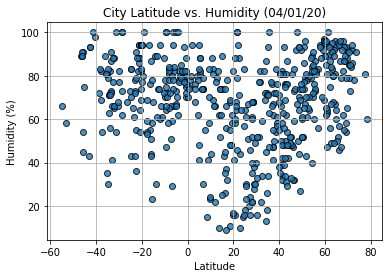

## Latitude vs. Cloudiness Plot

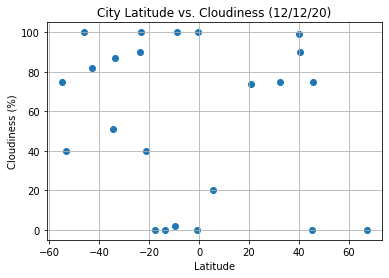

In [16]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Cloudiness.png")

# Display the graph
plt.show()

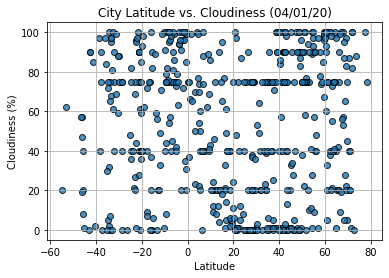

## Latitude vs. Wind Speed Plot

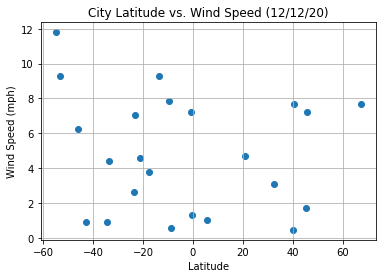

In [17]:
# Plot the data (scatter)
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Format the gragh
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the graph
plt.savefig("output_data/Lat_vs_Wind_Speed.png")

# Display the graph
plt.show()

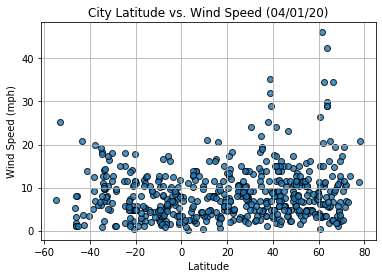

## Linear Regression

In [27]:
#Create Northern & Southern Hemisphere dataframes
north_hem_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hem_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
north_hem_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,ushtobe,45.25,77.98,256.75,89,0,1.72,KZ,1607812104
4,celestun,20.87,-90.40,298.43,68,74,4.72,MX,1607812104
5,georgetown,5.41,100.34,298.15,94,20,1.00,MY,1607811931
11,rognan,67.10,15.39,273.15,87,0,7.70,NO,1607812105
13,portland,45.52,-122.68,281.15,65,75,7.20,US,1607812046
15,lata,40.16,-8.33,288.15,91,99,0.45,PT,1607812106
21,russell,32.35,-85.20,295.15,56,75,3.10,US,1607812107
22,craig,40.52,-107.55,268.15,73,90,7.70,US,1607812107


The r-value is -0.6850544602353112


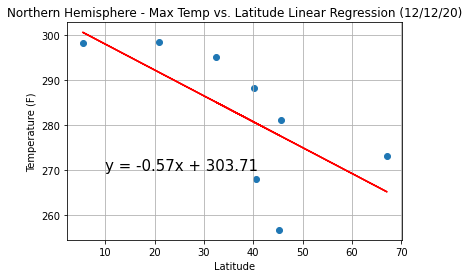

In [56]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Max Temp"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(10,270),fontsize=15,color="black")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Max_Temp.png")


# Display the information
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


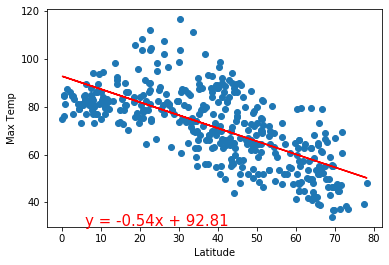

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7680415718529171


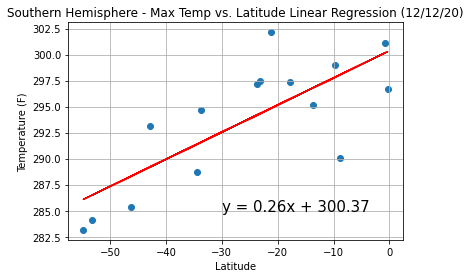

In [57]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Max Temp"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-30,285),fontsize=15,color="black")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Max_Temp.png")


# Display the information
plt.show()

The r-value is: 0.6082708688906918


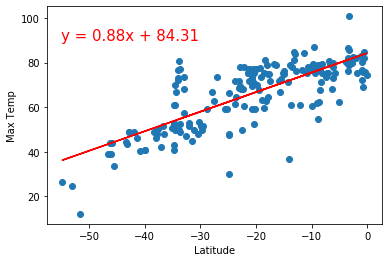

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.017989792755404785


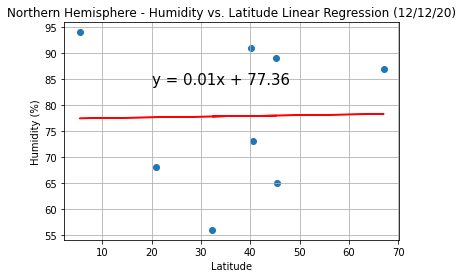

In [55]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Humidity"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(20,84),fontsize=15,color="black")
plt.title(f'Northern Hemisphere - Humidity vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Humidity.png")


# Display the information
plt.show()


The r-value is: 0.000543987878808455


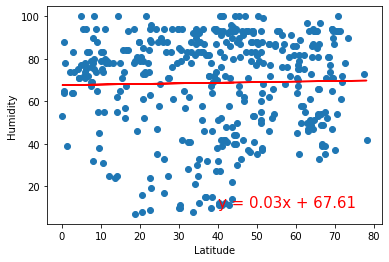

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.5360785156351753


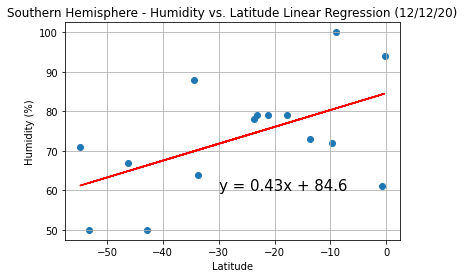

In [59]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Humidity"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-30,60),fontsize=15,color="black")
plt.title(f'Southern Hemisphere - Humidity vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Humidity.png")


# Display the information
plt.show()

The r-value is: 0.014985174297345524


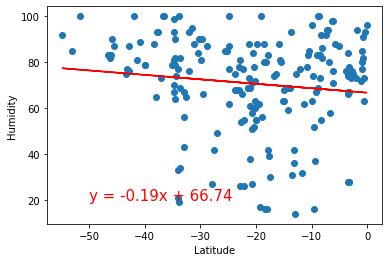

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.1857975415964694


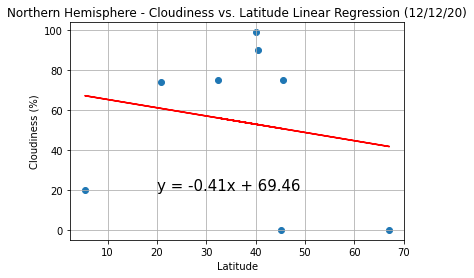

In [61]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Cloudiness"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(20,20),fontsize=15,color="black")
plt.title(f'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Cloudiness.png")


# Display the information
plt.show()

The r-value is: 0.0020898727664228514


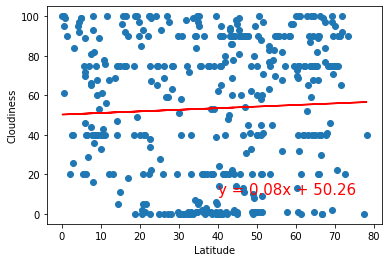

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.2982237785073579


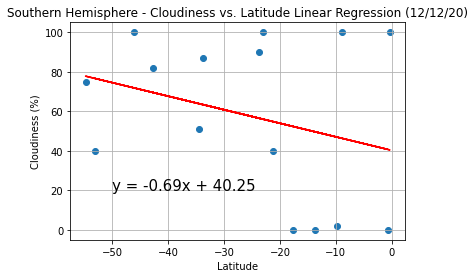

In [63]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Cloudiness"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-50,20),fontsize=15,color="black")
plt.title(f'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Cloudiness.png")


# Display the information
plt.show()

The r-value is: 0.0035263772085582894


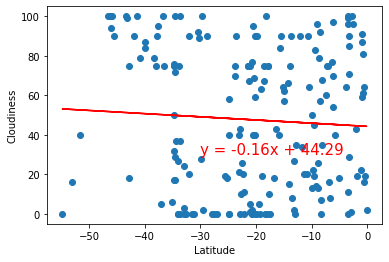

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.532471032250413


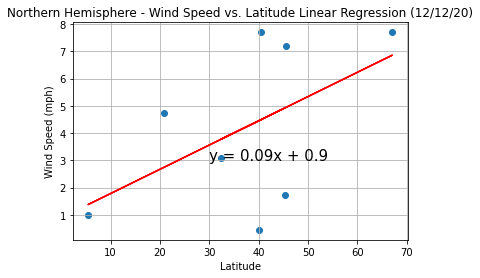

In [68]:
# Set plot variables x and y
north_x = north_hem_data["Lat"]
north_y = north_hem_data["Wind Speed"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_y)
regress_values = north_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x,north_y)
plt.plot(north_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(30,3),fontsize=15,color="black")
plt.title(f'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/NH_Lat_vs_Wind_Speed.png")


# Display the information
plt.show()

The r-value is: 0.04019723576144484


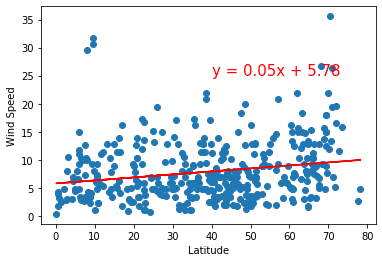

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2906412763254231


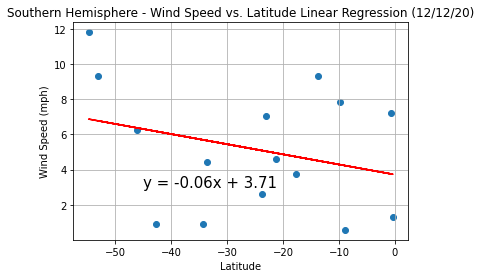

In [70]:
# Set plot variables x and y
south_x = south_hem_data["Lat"]
south_y = south_hem_data["Wind Speed"]


# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_y)
regress_values = south_x * slope + intercept

# Plot the graph with slope intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(south_x,south_y)
plt.plot(south_x,regress_values,"r-")

# Set the formatting of the graph
plt.annotate(line_eq,(-45,3),fontsize=15,color="black")
plt.title(f'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({time.strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# The r-value
print(f"The r-value is {rvalue}")

# Save the graph
plt.savefig("output_data/SH_Lat_vs_Wind_Speed.png")


# Display the information
plt.show()

The r-value is: 0.017128274759839232


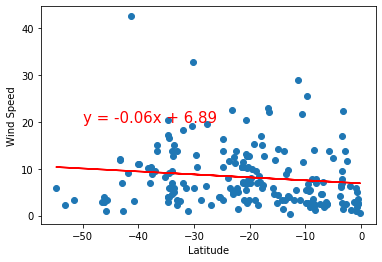